In [168]:
from opensimplex import OpenSimplex
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import path, patches

import random

import seaborn as sns

from scipy.spatial import Voronoi, voronoi_plot_2d

# Simplex Noise

In [3]:
gen = OpenSimplex()

def noise(x, y):
    # rescale from -1, 1 to 0, 1
    return gen.noise2d(x, y) / 2 +0.5

In [4]:

zs = np.zeros((200, 200))

for y in range(200):
    for x in range(200):
        nx = x/200 - 0.5
        ny = y/200 - 0.5
        zs[x][y] = noise(nx, ny)

In [5]:
xs = np.linspace(start=0, stop=199, num=200)
ys = np.linspace(start=0, stop=199, num=200)

xs, ys = np.meshgrid(xs, ys)

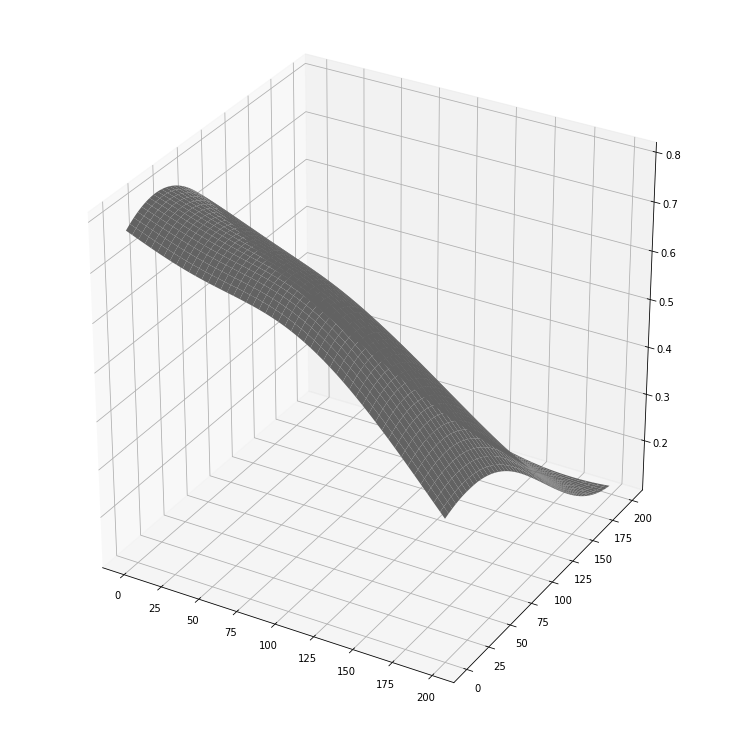

In [6]:
figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(111, projection='3d')


Axes3D(figure).plot_surface(xs, ys, zs, color='grey')

plt.show()

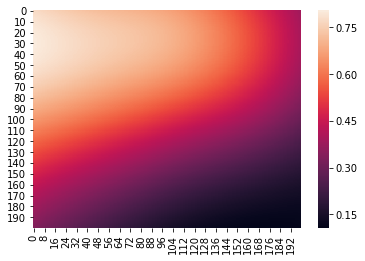

In [7]:
ax = sns.heatmap(zs)
plt.show()

In [8]:
def noise_arrays(a, b, freq):
    gen = OpenSimplex()
    
    def noise(p, q):
        # rescale from -1, 1 to 0, 1
        return gen.noise2d(p, q) / 2 +0.5
    
    xs = np.linspace(start=0, stop=a-1, num=a)
    ys = np.linspace(start=0, stop=b-1, num=b)

    xs, ys = np.meshgrid(xs, ys)
    
    zs = np.zeros((a, b))

    for y in range(b):
        for x in range(a):
            nx = x/a - 0.5
            ny = y/b - 0.5
            zs[x][y] = noise(freq*nx, freq*ny)
    
    return xs, ys, zs

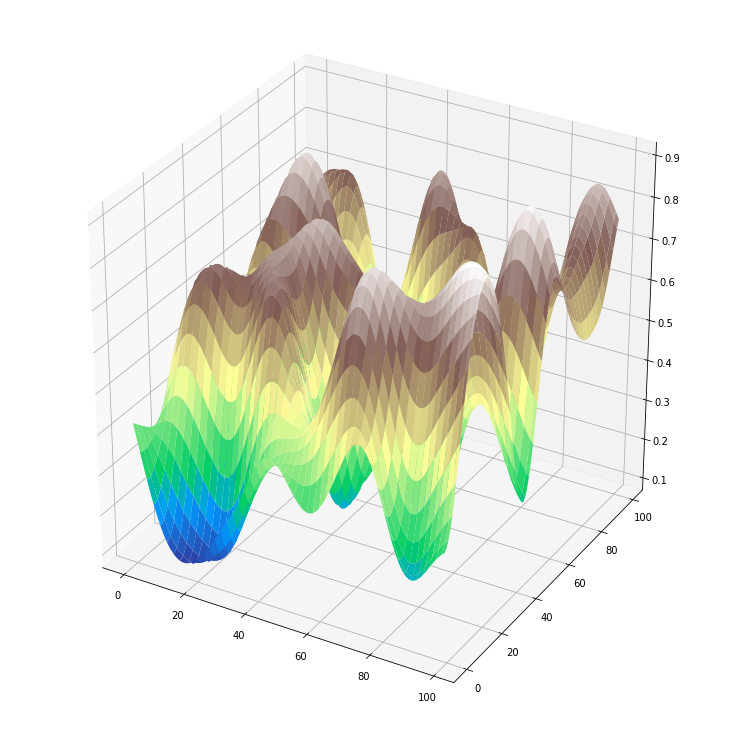

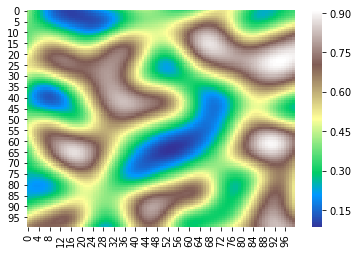

In [9]:
xs, ys, zs = noise_arrays(100, 100, freq=5)

figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(111, projection='3d')
Axes3D(figure).plot_surface(xs, ys, zs, cmap='terrain')
plt.show()

axheat = sns.heatmap(zs, cmap='terrain')
plt.show()

In [10]:
def display_plots(xs, ys, zs):
    figure = plt.figure(figsize=(20, 8))
    ax = figure.add_subplot(111, projection='3d')
    ax.plot_surface(xs, ys, zs, cmap='terrain')
    ax.set_axis_off()
    ax.view_init(azim=45)
    plt.show()

    axheat = sns.heatmap(zs, cmap='terrain')
    plt.show()

In [11]:
def scaler(x, offset=0.5, power=3):
    if x < offset:
        return x
    else:
        return (x-offset)**power + offset

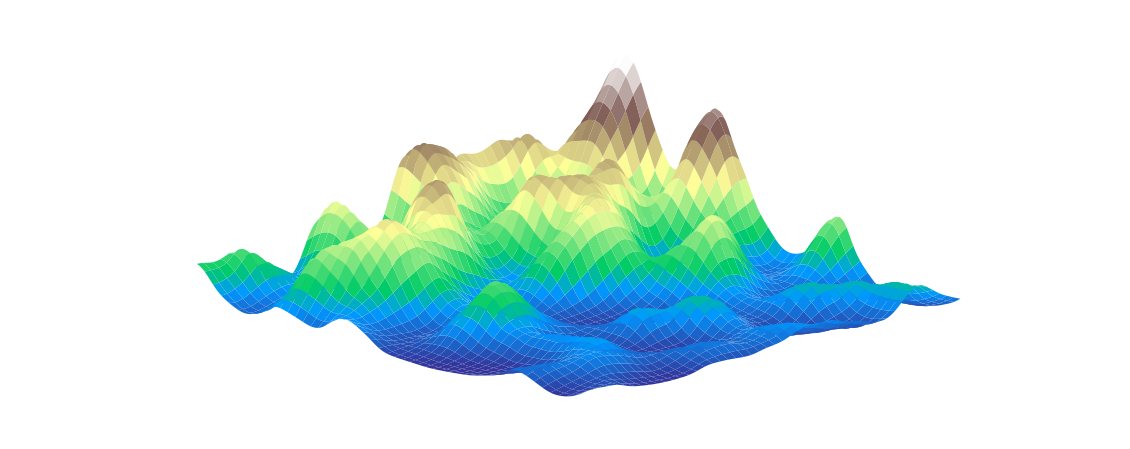

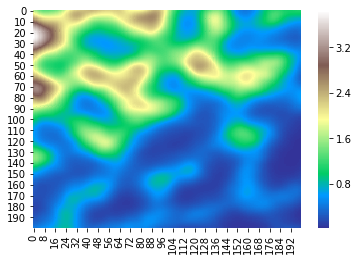

In [12]:
# layer noise arrays for more interesting terrain
xs, ys, zs = noise_arrays(200, 200, freq=1)

zs += 0.8*noise_arrays(200, 200, freq=7)[2] + 0.05*noise_arrays(200, 200, freq=20)[2]

zs **= 3

display_plots(xs, ys, zs)


# Voronoi Polygons

In [15]:
left = [(-0.1, 0.1*i) for i in range(10)]
right = [(1, 0.1*i) for i in range(10)]
up = [(0.1*i, 1) for i in range(10)]
down = [(0.1*i, -0.1) for i in range(10)]

edges = left + right + up + down

points = [(i/3, j/3) for i in range(3) for j in range(3)]

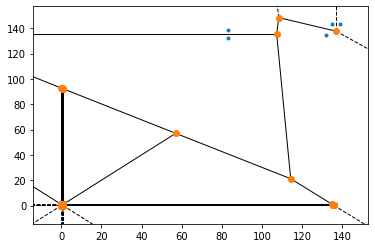

[[ 5.82544316e-01  3.80544474e-02]
 [ 6.94829601e-01  4.39193672e-01]
 [ 5.79456970e-01  1.87250377e-01]
 [ 8.17000751e-01  7.81468514e-01]
 [ 3.63901703e-01  8.82632970e-01]
 [ 6.43978431e-01  2.73387000e-01]
 [ 5.55007139e-02  5.45045892e-02]
 [ 6.21663289e-01  3.31471713e-01]
 [ 2.49639955e-01  8.25519664e-01]
 [ 8.47669548e-02  3.88255408e-01]
 [ 3.53326647e-01  7.07797535e-01]
 [ 2.28620762e-02  3.73363973e-02]
 [ 7.07702778e-01  3.95256642e-01]
 [ 8.37791206e-01  4.20038363e-01]
 [ 1.81970858e-01  5.97420986e-01]
 [ 6.75515219e-02  3.38433620e-01]
 [ 8.21532176e-01  5.58715847e-01]
 [ 5.50123745e-01  7.12646351e-01]
 [ 5.12689929e-01  5.60242801e-01]
 [ 6.76353015e-01  6.02009805e-01]
 [ 6.78501465e-02  1.46815170e-01]
 [ 8.13115130e-01  7.05132492e-01]
 [ 6.26827397e-01  7.66081088e-01]
 [ 6.07723593e-02  1.62846566e-01]
 [ 7.84366318e-01  3.23168349e-01]
 [ 3.41972449e-01  3.96462565e-02]
 [ 2.18250893e-01  2.24966089e-01]
 [ 8.92393689e-01  1.29605484e-01]
 [ 7.15235128e-01  6

In [169]:
points.extend(edges)
voro = Voronoi(points)
voronoi_plot_2d(voro)
plt.show()

print(voro.points)
print(voro.regions)
print(voro.vertices)

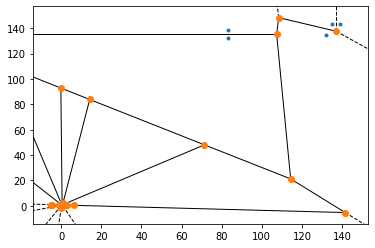

In [170]:
points = [(random.random(), random.random()) for i in range(80)]
points.extend(edges)

voro = Voronoi(points)
voronoi_plot_2d(voro)
plt.show()

[11, 9, 8, 10]
[0.13429411 0.6310499 ]
[0.60118286 0.86723928]
[0.68035381 0.81800135]
[0.71817019 0.87079912]
[0.62354814 0.91690576]


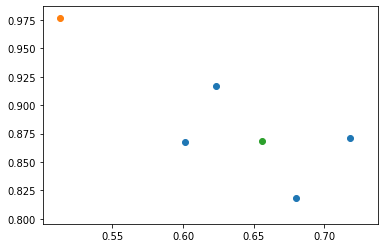

In [18]:
print(voro.regions[1])
print('=======')
print(voro.points[1])
print('=======')
scatter_points = []
for index in voro.regions[15]:
    print(voro.vertices[index])
    scatter_points.append(voro.vertices[index])

xs = [i[0] for i in scatter_points]
ys = [i[1] for i in scatter_points]

plt.scatter(xs, ys)
plt.scatter(voro.points[0][0], voro.points[0][1])
mean = np.mean(scatter_points, axis=0)
plt.scatter(mean[0], mean[1])
plt.show()

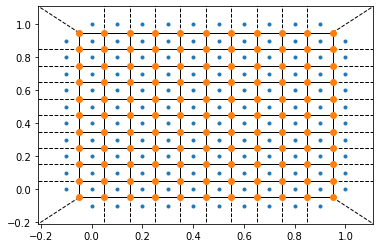

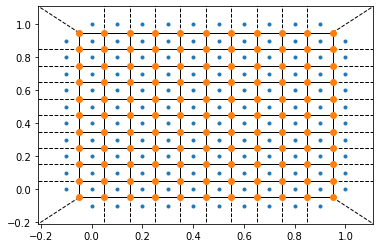

In [19]:
left = [(-0.1, 0.1*i) for i in range(10)]
right = [(1, 0.1*i) for i in range(10)]
up = [(0.1*i, 1) for i in range(10)]
down = [(0.1*i, -0.1) for i in range(10)]

edges = left + right + up + down

points = [(i*0.1, j*0.1) for i in range(10) for j in range(10)]
points.extend(edges)

voro = Voronoi(points)
voronoi_plot_2d(voro)
new_points = edges

for i, point in enumerate(voro.points):
    if point[0] in (1, -0.1) or point[1] in (1, -0.1):
        pass
    else:
        region_index = voro.point_region[i]
        region = voro.regions[region_index]
        corners = []
        for index in region:
            corners.append(voro.vertices[index])
        new_points.append(np.mean(corners, axis=0))

new_voro = Voronoi(new_points)
voronoi_plot_2d(new_voro)

plt.show()

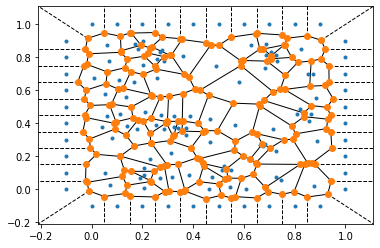

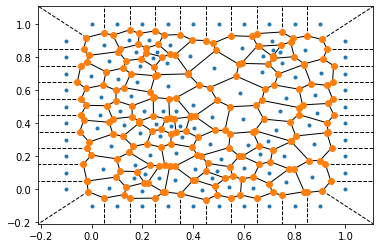

In [171]:
points = [(random.random()*0.9, random.random()*0.9) for i in range(80)]

edges = left + right + up + down

points.extend(edges)

voro = Voronoi(points)
voronoi_plot_2d(voro)
new_points = edges

for i, point in enumerate(voro.points):
    if point[0] in (1, -0.1) or point[1] in (1, -0.1):
        pass
    else:
        region_index = voro.point_region[i]
        region = voro.regions[region_index]
        corners = []
        for index in region:
            corners.append(voro.vertices[index])
        new_points.append(np.mean(corners, axis=0))

new_voro = Voronoi(new_points)
voronoi_plot_2d(new_voro)

plt.show()

6
[array([0.37329663, 0.13020145]), array([ 0.36763578, -0.01801671]), array([ 0.35      , -0.02685352]), array([ 0.27958742, -0.01728237]), array([0.26601278, 0.11259071]), array([0.31231491, 0.14022334]), array([0.37329663, 0.13020145])]
7
[1, 2, 2, 2, 2, 2, 2]
7


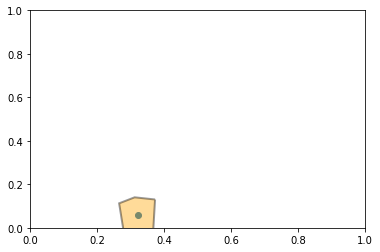

In [102]:
corners = []
for index in new_voro.regions[new_voro.point_region[65]]:
    corners.append(new_voro.vertices[index])
print(len(new_voro.regions[new_voro.point_region[65]]))
corners.append(corners[0])
codes = []
for i in range(len(corners)):
    if i == 0:
        codes.append(path.Path.MOVETO)
    elif i == len(corners):
        codes.append(path.Path.CLOSEPOLY)
    else:
        codes.append(path.Path.LINETO)


print(corners)
print(len(corners))
print(codes)
print(len(codes))
polygon = path.Path(corners, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(polygon, facecolor='orange', lw=2, alpha=0.4)
ax.add_patch(patch)
plt.scatter(new_voro.points[65][0], new_voro.points[65][1])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

In [103]:
def draw_region_at_index(voronoi_object, n):
    corners = []
    for index in voronoi_object.regions[voronoi_object.point_region[n]]:
        corners.append(voronoi_object.vertices[index])
    corners.append(corners[0])
    codes = []
    for i in range(len(corners)):
        if i == 0:
            codes.append(path.Path.MOVETO)
        elif i == len(corners) -1:
            codes.append(path.Path.CLOSEPOLY)
        else:
            codes.append(path.Path.LINETO)



    polygon = path.Path(corners, codes)

    ax = plt.subplot(1, 1, 1)
    patch = patches.PathPatch(polygon, facecolor='orange', lw=2, alpha=0.4)
    ax.add_patch(patch)
    plt.scatter(voronoi_object.points[n][0], voronoi_object.points[n][1])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

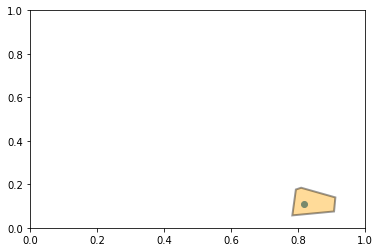

In [92]:
draw_region_at_index(new_voro, 65)
plt.show()

In [34]:
polygon.contains_points(new_voro.points[65].reshape(1, 2))

array([ True])

In [165]:
class MapGrid:
    def __init__(self, voronoi_object):
        self.vertices = voronoi_object.vertices
        self.centers = voronoi_object.points
        
        # face entry in list contains indices of vertices, in an order that corresponds to centers
        self.faces = [voronoi_object.regions[i] for i in voronoi_object.point_region]

        # voronoi edges connect vertices and outline faces
        self.edges_v = voronoi_object.ridge_vertices
        # delawnay edges connect centers and are perpendicular to voronoi edges
        self.edges_d = voronoi_object.ridge_points
    
    def face_neighbours(self, n):
        # returns indices of each face adjacent to the face at index n
        connecting_lines = [connector for connector in self.edges_d if n in connector]
        return [a if a != n else b for a , b in connecting_lines]
    
    def face_edges(self, n):
        # return vertex index pairs bordering face n
        corners = self.faces[n]
        borders = []
        for x, y in self.edges_v:
            if x in corners and y in corners:
                borders.append([x, y])
        return borders
    
    def corner_faces(self, n):
        # return faces touching a corner
        return [i for i in range(len(self.faces)) if n in self.faces[i]]
    
    def corner_protrudes(self, n):
        # return edges protruding from vertex n
        return [connector for connector in self.edges_v if n in connector]
    
    def corner_connected(self, n):
        # return corners connected to corner n
        pairs = self.corner_protrudes(n)
        return [a if a != n else b for a , b in pairs]

[57, 52, 100, 110, 49, 66]


/home/suzanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


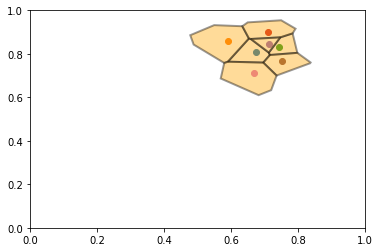

In [173]:
grid = MapGrid(new_voro)

draw_region_at_index(new_voro, 80)
print(grid.face_neighbours(80))
for index in grid.face_neighbours(80):
    draw_region_at_index(new_voro, index)
plt.show()

[99, 102]
[ 74 119]


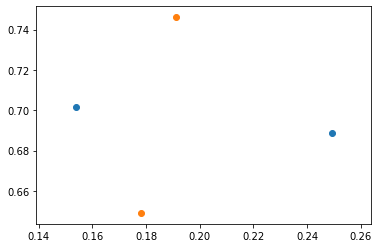

In [182]:
print(grid.edges_v[100])
print(grid.edges_d[100])
corners = grid.vertices[99], grid.vertices[102]
face_centers = grid.centers[74], grid.centers[119]

plt.scatter([i[0] for i in corners], [i[1] for i in corners])
plt.scatter([i[0] for i in face_centers], [i[1] for i in face_centers])
plt.show()

In [183]:
class MapGrid:
    def __init__(self, voronoi_object):
        # the voronoi object comes from scipy
        # will need to deal with -1 indexing from voronoi class TODO
        ordered_faces = [voronoi_object.regions[i] for i in voronoi_object.point_region]
        self.faces = [Face(xy, ordered_faces[i]) for i, xy in enumerate(voronoi_object.points)]
        self.vertices = [Vertex(xy) for xy in voronoi_object.vertices]
        self.edges = [Edge(*voronoi_object.ridge_vertices[i], *voronoi_object.ridge_points[i]) for i in range(len(voronoi_object.ridge_vertices))]

        for i, edge in enumerate(self.edges):
            # for each edge, connect the vertices at each end and the faces on either side
            vertindexa, vertindexb = edge.vertices
            # connect vertices to one another
            self.vertices[vertindexa].connected_vertices.append(vertindexb)
            self.vertices[vertindexb].connected_vertices.append(vertindexa)
            # connect vertices to edge
            self.vertices[vertindexa].connected_edges.append(i)
            self.vertices[vertindexb].connected_edges.append(i)
            # connect faces to one another
            faceindexa, faceindexb = edge.faces
            self.faces[faceindexa].adjacent_faces.append(faceindexb)
            self.faces[faceindexb].adjacent_faces.append(faceindexa)
            # connect faces to edges
            self.faces[faceindexa].bordering_edges.append(i)
            self.faces[faceindexb].bordering_edges.append(i)
        # connect vertices and faces
        for i, face in enumerate(self.faces):
            for vertex_index in face.vertices:
                self.vertices[vertex_index].adjacent_faces.append(i)

class Vertex:
    def __init__(self, xy):
        # a vertex needs to have xy coordinates, connected vertices, connected edges, and adjacent faces.
        self.xy = xy
        self.connected_vertices = []    # dealt with in MapGrid
        self.connected_edges = []       # dealt with in MapGrid
        self.adjacent_faces = []        # TODO


class Face:
    # a face needs xy coordinates of its center, indices of its its neighbouring faces, indices of bordering edges,
    # indices of bordering Vertices,
    def __init__(self, xy, vertices):
        self.xy = xy
        self.adjacent_faces = []    # dealt with in MapGrid
        self.bordering_edges = []   # dealt with in MapGrid
        self.vertices = vertices


class Edge:
    # a voronoi edge needs vertex indices at each end and face indices either side
    def __init__(self, a, b, x, y):
        self.vertices = [a, b]
        self.faces = [x, y]


In [184]:
grid = MapGrid(new_voro)